In [113]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.flow import shortest_augmenting_path

### Functions to creat a random graph

In [129]:
def generate_adjacency_matrix(vertices, edges):
    # Creating the zero adjacency matrix
    matrix = np.zeros((vertices, vertices), dtype=int)
    edges_added = 0
    
    # СCreating the empty graph
    graph = nx.Graph()
    
    # Adding the verticies into the graph
    graph.add_nodes_from(range(vertices))
    
    # Generating random edges
    while edges_added < edges:
        i = random.randint(0, vertices-1)
        j = random.randint(0, vertices-1)
        if i != j and matrix[i][j] == 0:
            matrix[i][j] = 1
            matrix[j][i] = 1  # для неориентированного графа
            edges_added += 1
    
    # Adding edges into the graph
    for i in range(vertices):
        for j in range(i + 1, vertices):
            if matrix[i][j] == 1:
                graph.add_edge(i, j)
    graph.adjacency_matrix = matrix
    
    return graph

### Function to calculate the connectivity
The Menger's theorem is used

In [131]:
def graph_connectivity(G):
    # Check if the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Connectivity is 0.")
        return {'vertex_connectivity': 0, 'edge_connectivity': 0}
    start_time = time.perf_counter()
    k = nx.node_connectivity(G)
    vertex_time = time.perf_counter() - start_time
    start_time = time.perf_counter()
    l = nx.edge_connectivity(G)
    edge_time = time.perf_counter() - start_time
    return {'vertex_connectivity': k, 'vertex_time':vertex_time, 'edge_connectivity': l, 'edge_time': edge_time}

def calculate_edges_for_density(vertices, density):
    if vertices <= 1:
        return 0
    
    # The minimum number of edges for the connected graph
    min_edges = vertices - 1
    
    # The maximum possible number of edges in a complete graph
    max_edges = vertices * (vertices - 1) // 2
    
    # Calculating the number of edges based on density
    calculated_edges = int(max_edges * density)
    
    # Toguarantee that the graph will be connected:
    # - if the calculated quantity is less than the minimum, use the minimum + a small margin
    # - if the calculated amount is too large, we limit it to a reasonable value
    if calculated_edges < min_edges:
        extra_edges = max(1, int(min_edges * 0.15))
        edges = min_edges + extra_edges
    else:
        reasonable_max = int(max_edges * 0.3)
        edges = min(calculated_edges, reasonable_max)
    edges = min(edges, max_edges)
    
    return edges

### Testing the algorithm with different graph size

The number of vertices is 10, the number of edges is 10
 Graph is not connected
The number of vertices is 100, the number of edges is 247
 Graph is not connected
The number of vertices is 300, the number of edges is 2242
Graph vertex connectivity κ(G): 2
Graph vertex time: 1.284779 seconds
Graph edge connectivity λ(G): 2
Graph edge time: 0.121563 seconds
The number of vertices is 600, the number of edges is 7188
Graph vertex connectivity κ(G): 11
Graph vertex time: 12.478575 seconds
Graph edge connectivity λ(G): 11
Graph edge time: 0.712507 seconds
The number of vertices is 800, the number of edges is 9588
Graph vertex connectivity κ(G): 8
Graph vertex time: 16.932203 seconds
Graph edge connectivity λ(G): 8
Graph edge time: 1.026196 seconds
The number of vertices is 1000, the number of edges is 9990
Graph vertex connectivity κ(G): 6
Graph vertex time: 23.122214 seconds
Graph edge connectivity λ(G): 6
Graph edge time: 1.429096 seconds


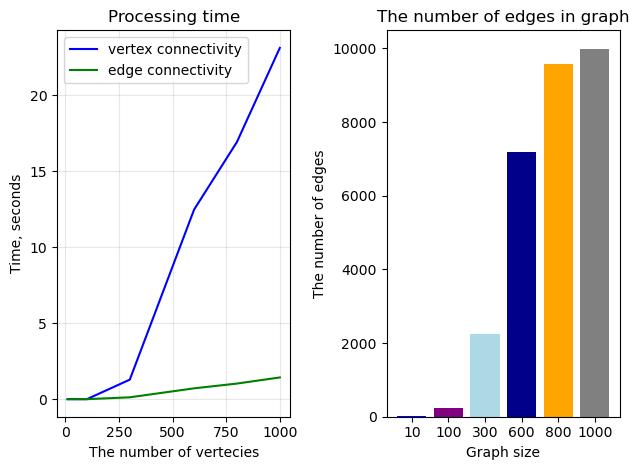

In [137]:
graph_sizes = [10, 100, 300, 600, 800, 1000]
densities = [0.1, 0.05, 0.05, 0.04, 0.03, 0.02]  # Graph density, different for different sizes
results = []

for i, size in enumerate(graph_sizes):
    density = densities[i]
    edges = calculate_edges_for_density(size, density)
    print(f"The number of vertices is {size}, the number of edges is {edges}")

    G = generate_adjacency_matrix(size, edges)
    is_connected = nx.is_connected(G)
        
    if is_connected:
        connectivity = graph_connectivity(G)
        vertex_conn = connectivity['vertex_connectivity']
        edge_conn = connectivity['edge_connectivity']
        vertex_time = connectivity['vertex_time']
        edge_time = connectivity['edge_time']

        print(f"Graph vertex connectivity κ(G): {vertex_conn}")
        print(f"Graph vertex time: {vertex_time:.6f} seconds")
        print(f"Graph edge connectivity λ(G): {edge_conn}")
        print(f"Graph edge time: {edge_time:.6f} seconds")
            
        results.append({
            'size': size,
            'edges': G.number_of_edges(),
            'vertex_connectivity': vertex_conn,
            'edge_connectivity': edge_conn,
            'vertex_time': vertex_time,
            'edge_time': edge_time
            })
    else:
        print(" Graph is not connected")
        results.append({
            'size': size,
            'edges': G.number_of_edges(),
            'vertex_connectivity': 0,
            'edge_connectivity': 0,
            'vertex_time': 0,
            'edge_time': 0
            })

sizes = [r['size'] for r in results]
vertex_times = [r['vertex_time'] for r in results]
edge_times = [r['edge_time'] for r in results]

plt.figure()
    
plt.subplot(1, 2, 1)
plt.plot(sizes, vertex_times, 'b', label='vertex connectivity')
plt.plot(sizes, edge_times, 'g', label='edge connectivity')
plt.xlabel('The number of vertecies')
plt.ylabel('Time, seconds')
plt.title('Processing time')
plt.legend()
plt.grid(True, alpha=0.3)

    
plt.subplot(1, 2, 2)
edges = [r['edges'] for r in results]
plt.bar([str(size) for size in sizes], edges, color=['blue', 'purple', 'lightblue', 'darkblue', 'orange', 'gray'])
plt.xlabel('Graph size')
plt.ylabel('The number of edges')
plt.title('The number of edges in graph')
    
plt.tight_layout()
plt.show()

### Results
1. The complexity of vertex connectivity is close to exponential, but most likely about O(n^3) or higher. Since different edges coverage densities were used, it is difficult to say for sure.
2. The complexity of edge connectivity is much lower, corresponding approximately to O(n^2) or O(n*m).
3. Based on the Menger's theorem that is used as the basis of the algorithm, the theoretical complexity of vertex connectivity is about O(n^5) and for edge connectivity is about O(n^2*m).